# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

shape (150, 2)


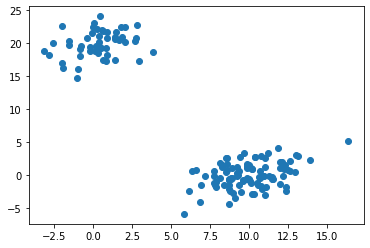

In [8]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print("shape:",X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [12]:
Z = linkage(X, "ward")


In [14]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
# comparamos las distancias con estas librerias con los datos originales y si se aproxima a 1 es vastante bueno

In [17]:
c, coph_dist = cophenet(Z, pdist(X))# pdist(X) para la distancia original de los datos
c

0.9800148387574268

In [19]:
coph_dist

array([ 1.49619316, 23.12198936,  6.44511711, ...,  0.85438969,
        1.7940741 ,  1.7940741 ])

In [20]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [21]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [22]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [23]:
print(Z[152-len(X)])# cluster 152  
print(Z[158-len(X)])#cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [24]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

In [26]:
idx = [33,62,68]
idx2 = [15,69,41]
print(idx)
print(idx2)

[33, 62, 68]
[15, 69, 41]


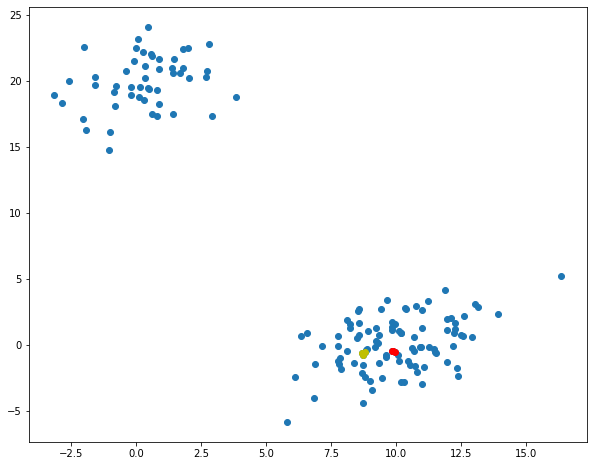

In [27]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()

### Representación gráfica de un dendrograma

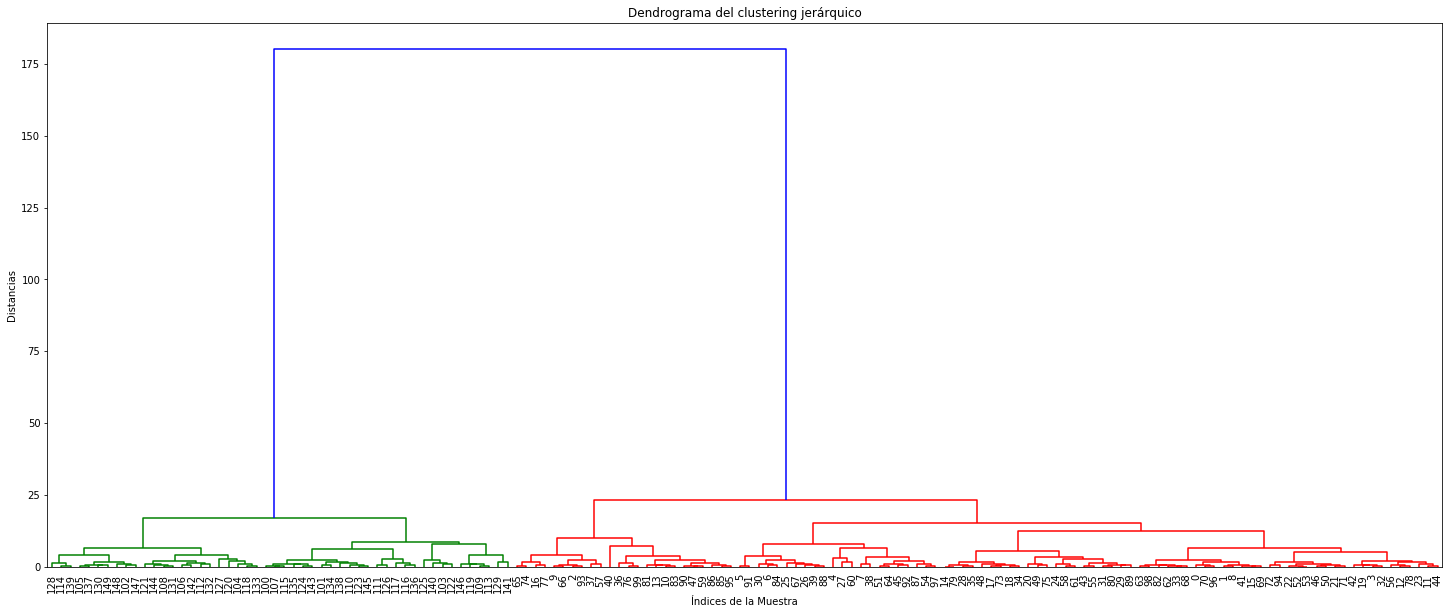

In [34]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0, color_threshold=0.7*180)# color_threshold=0.7 para especificar el % a pintar 
plt.show()

In [31]:
Z[-4:,]# muestra los ultimos 4

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

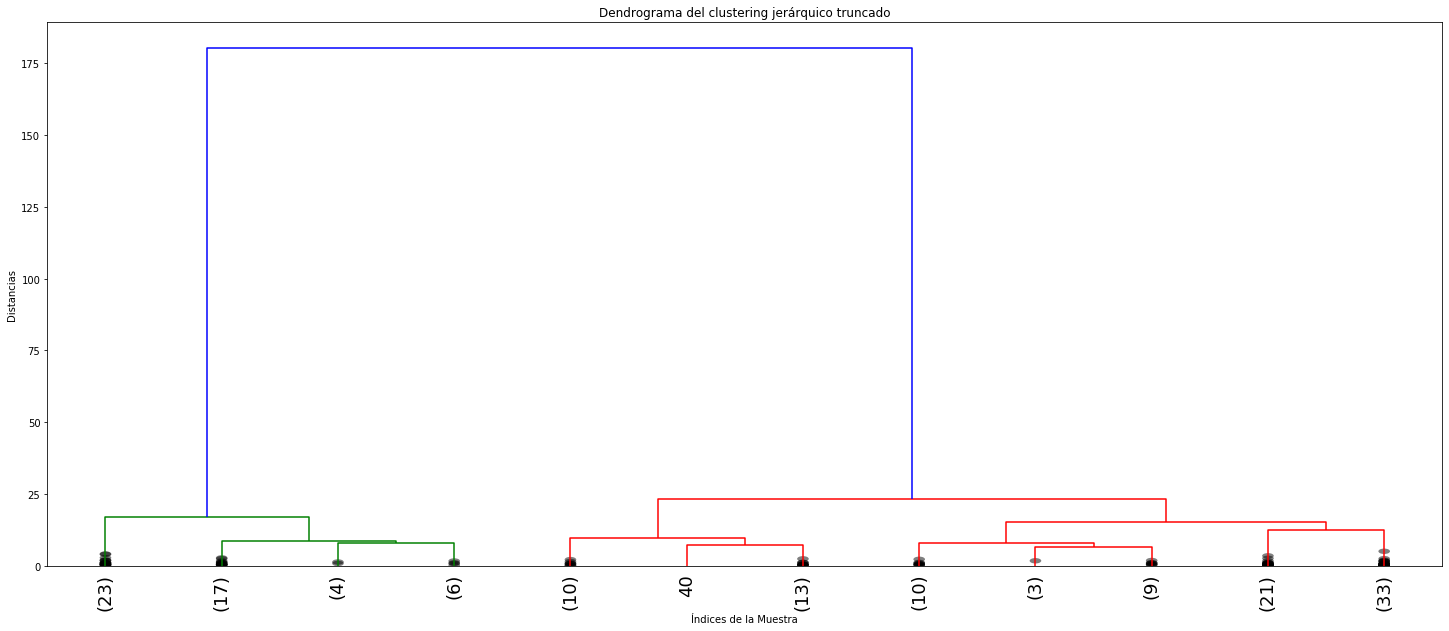

In [36]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=18.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
plt.show()
# truncate_mode="lastp" : muestra los ultimos
# p=12 : numero de closter a mostrar
# show_contracted=True : para contraer o No

### Dendrograma tuneado

In [43]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

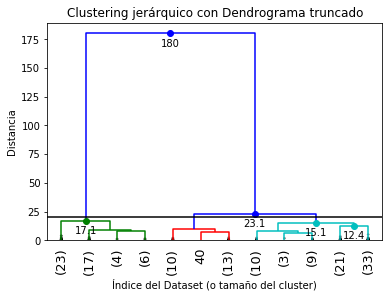

In [52]:
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=13.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)
(altura / promedio de las alturas) / sobre las desviaciones estandar

In [54]:
from scipy.cluster.hierarchy import inconsistent

In [55]:
depth = 3  # profundida deseada
incons = inconsistent(Z, depth)
incons[-10:]# las 10 ultimas

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo


[[ 40.         278.           7.11106083  14.        ]
 [277.         288.           7.86878542  22.        ]
 [266.         280.           8.04935282  10.        ]
 [285.         291.           8.74822275  27.        ]
 [282.         289.           9.84427829  24.        ]
 [284.         286.          12.42734657  54.        ]
 [290.         294.          15.11533118  76.        ]
 [287.         292.          17.11527362  50.        ]
 [293.         295.          23.12198936 100.        ]
 [296.         297.         180.27043021 150.        ]]
[  7.11106083   7.86878542   8.04935282   8.74822275   9.84427829
  12.42734657  15.11533118  17.11527362  23.12198936 180.27043021]
[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


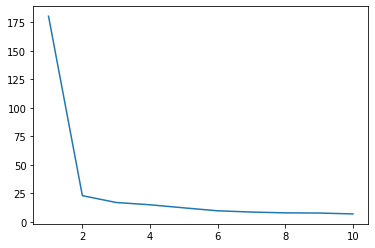

In [62]:
last = Z[-10:]
print(last)
last = Z[-10:,2] # me quedo con la tercer columna
print(last)
last_rev = last[::-1] # se revierte el array
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)


[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


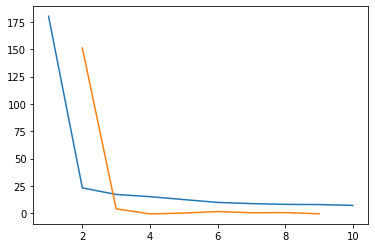

El número óptimo de cluster es 2


In [63]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)# array de acceleracion de 2 en 2
acc_rev = acc[::-1]# invertir el array
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

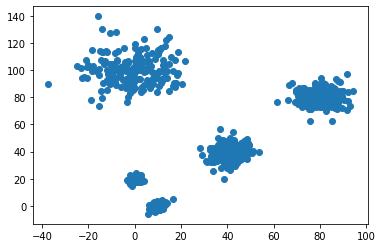

[[  9.21188389  -0.15188589]
 [  8.88937431  -0.33937464]
 [ 10.76840064   2.95244645]
 ...
 [  0.81814775 109.81858505]
 [  2.1305245   93.65154096]
 [ -3.18946066  76.43601554]]


In [67]:
# Ej: de otra distribucion
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()
print(X2)

In [69]:
Z2 = linkage(X2,"ward")
Z2

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       ...,
       [1.49000000e+03, 1.49500000e+03, 6.21282563e+02, 3.50000000e+02],
       [1.49100000e+03, 1.49400000e+03, 1.18035968e+03, 4.00000000e+02],
       [1.49600000e+03, 1.49700000e+03, 1.27593070e+03, 7.50000000e+02]])

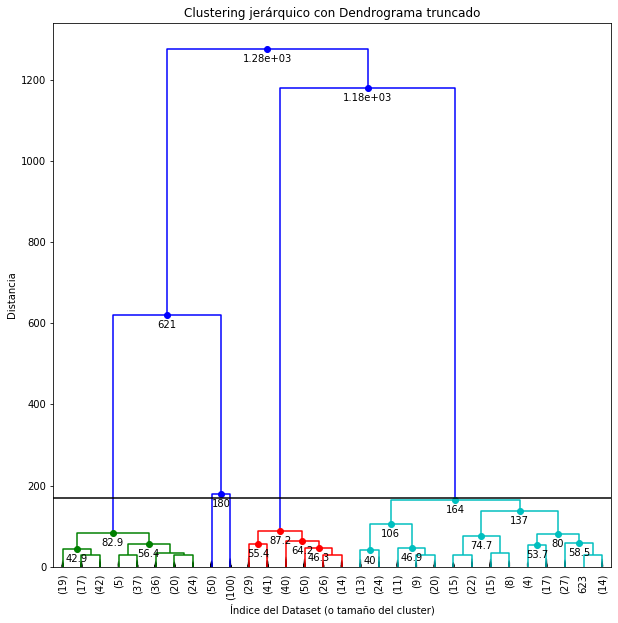

In [70]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1275.93069657 1180.35968148  621.28256327  180.27043021  163.87883118
  136.69274768  106.35514756   87.15404626   82.9297304    80.03908865]


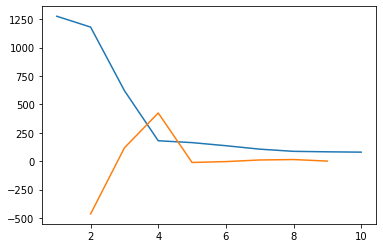

El número óptimo de cluster es 4


In [71]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [80]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


# Recuperar los clusters y sus elementos

In [73]:
from scipy.cluster.hierarchy import fcluster

In [76]:
max_d=25 # cortar por distancia
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [80]:
k=2
clusters = fcluster(Z, k, criterion="maxclust")# Numero de cluster
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
fcluster(Z, 8, depth=10)# 8 elementos y 10 de profundida

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

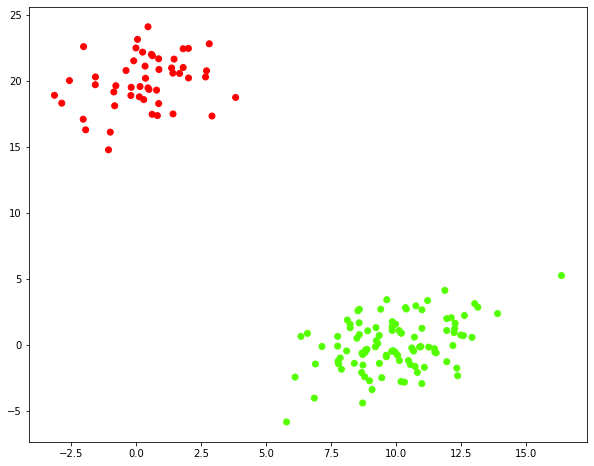

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

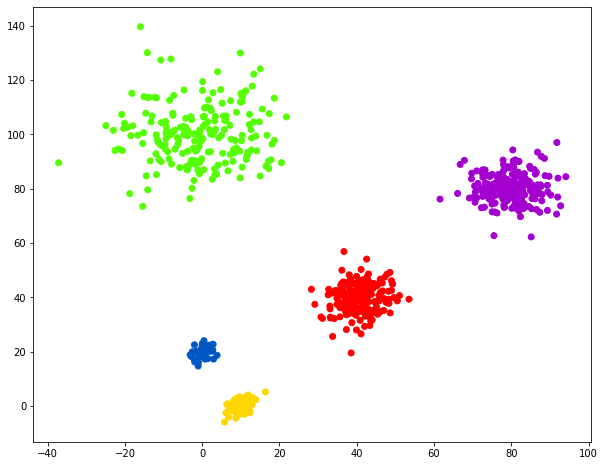

In [83]:
max_d=170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()